<a href="https://colab.research.google.com/github/cdixson-ds/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [6]:
#Function for mean

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def mean_i(i):
  n = len(i)
  get_sum = sum(i)
  mean = get_sum/n
  print('Mean :', mean)

mean_i(sales)

Mean : 3052.714285714286


In [8]:
#function for variance

mean_1 = 3052.714285714286

def variance(i, mean):
  variance = 0
  n = len(i)
  for i in i:
    variance = variance + (mean-i) **2
  return variance/(n-1)

print('Variance: ', variance(sales, mean_1))


Variance:  214387.90476190473


In [9]:
#Function for standard deviation

sales_variance = 214387.90476190473

def std_deviation(variance):
  stdv = variance ** 0.5
  return stdv

print('Standard Deviation: ', std_deviation(sales_variance))


Standard Deviation:  463.0204150595357


In [13]:
#Checking my work with Numpy

import numpy as np

print('Mean: ', np.mean(sales))
print('Variance: ', np.var(sales, ddof=1))  #pass ddof=1 (n-1 in the denominator)
print('Standard Deviation: ', np.std(sales, ddof=1))

Mean:  3052.714285714286
Variance:  214387.90476190473
Standard Deviation:  463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [15]:
cust = [127, 80, 105, 92, 120, 115, 93]

covariance = np.cov(sales, cust, ddof=1)[0][1]

print(covariance)

7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [16]:
mean_i(cust)
#np.mean(cust)

Mean : 104.57142857142857


In [17]:
mean_cust = 104.57142857142857

print('Variance: ', variance(cust, mean_cust))
#np.var(cust, ddof=1)

Variance:  290.95238095238096


In [18]:
cust_variance = 290.95238095238096

print('Standard Deviation: ', std_deviation(cust_variance))
#print('Standard Deviation: ', np.std(cust, ddof=1))

Standard Deviation:  17.057326313123664


In [0]:
std_sales = std_deviation(sales_variance)
std_cust = std_deviation(cust_variance)



In [20]:
#calculate the correlation coefficient

correl_coef = covariance/(std_sales * std_cust)
print(correl_coef)

0.9628339778148909


In [21]:
#Checking work with Numpy

np.corrcoef(sales, cust)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [22]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [23]:
df.isnull().sum()

Unnamed: 0             0
pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [0]:
df = df.drop('cabin', 1)


In [0]:
df = df.drop('name', 1)

In [0]:
df = df.drop('home.dest', 1)

In [0]:
df = df.drop('Unnamed: 0', 1)

In [28]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,has_cabin_number
0,1.0,1.0,female,29.0000,0.0,0.0,24160,211.3375,S,2,NaN,1
1,1.0,1.0,male,0.9167,1.0,2.0,113781,151.5500,S,11,NaN,1
2,1.0,0.0,female,2.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,1
3,1.0,0.0,male,30.0000,1.0,2.0,113781,151.5500,S,NaN,135.0,1
4,1.0,0.0,female,25.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,1


In [0]:
df = df.replace({'S':1})

In [0]:
df = df.replace({'C':0})

In [0]:
df = df.replace({'male':1})

In [0]:
df = df.replace({'female':0})

In [33]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,has_cabin_number
0,1.0,1.0,0.0,29.0000,0.0,0.0,24160,211.3375,1,2,NaN,1
1,1.0,1.0,1.0,0.9167,1.0,2.0,113781,151.5500,1,11,NaN,1
2,1.0,0.0,0.0,2.0000,1.0,2.0,113781,151.5500,1,NaN,NaN,1
3,1.0,0.0,1.0,30.0000,1.0,2.0,113781,151.5500,1,NaN,135.0,1
4,1.0,0.0,0.0,25.0000,1.0,2.0,113781,151.5500,1,NaN,NaN,1


In [0]:
df = df.drop('boat', 1)

In [0]:
df = df.drop('body', 1)

In [36]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,has_cabin_number
0,1.0,1.0,0.0,29.0000,0.0,0.0,24160,211.3375,1,1
1,1.0,1.0,1.0,0.9167,1.0,2.0,113781,151.5500,1,1
2,1.0,0.0,0.0,2.0000,1.0,2.0,113781,151.5500,1,1
3,1.0,0.0,1.0,30.0000,1.0,2.0,113781,151.5500,1,1
4,1.0,0.0,0.0,25.0000,1.0,2.0,113781,151.5500,1,1


In [37]:
df = df.dropna()
df.isnull().sum()

pclass              0
survived            0
sex                 0
age                 0
sibsp               0
parch               0
ticket              0
fare                0
embarked            0
has_cabin_number    0
dtype: int64

In [38]:
df.dtypes

pclass              float64
survived            float64
sex                 float64
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
embarked             object
has_cabin_number      int64
dtype: object

In [0]:
df['ticket']=pd.to_numeric(df['ticket'], errors='coerce')

In [0]:
df['embarked']=pd.to_numeric(df['embarked'], errors='coerce')

In [41]:
df.dtypes

pclass              float64
survived            float64
sex                 float64
age                 float64
sibsp               float64
parch               float64
ticket              float64
fare                float64
embarked            float64
has_cabin_number      int64
dtype: object

In [42]:
df.dtypes

pclass              float64
survived            float64
sex                 float64
age                 float64
sibsp               float64
parch               float64
ticket              float64
fare                float64
embarked            float64
has_cabin_number      int64
dtype: object

In [43]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,has_cabin_number
0,1.0,1.0,0.0,29.0000,0.0,0.0,24160.0,211.3375,1.0,1
1,1.0,1.0,1.0,0.9167,1.0,2.0,113781.0,151.5500,1.0,1
2,1.0,0.0,0.0,2.0000,1.0,2.0,113781.0,151.5500,1.0,1
3,1.0,0.0,1.0,30.0000,1.0,2.0,113781.0,151.5500,1.0,1
4,1.0,0.0,0.0,25.0000,1.0,2.0,113781.0,151.5500,1.0,1


In [0]:
#add in later

cabin = df['has_cabin_number'].astype('float64')

In [45]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,has_cabin_number
0,1.0,1.0,0.0,29.0000,0.0,0.0,24160.0,211.3375,1.0,1
1,1.0,1.0,1.0,0.9167,1.0,2.0,113781.0,151.5500,1.0,1
2,1.0,0.0,0.0,2.0000,1.0,2.0,113781.0,151.5500,1.0,1
3,1.0,0.0,1.0,30.0000,1.0,2.0,113781.0,151.5500,1.0,1
4,1.0,0.0,0.0,25.0000,1.0,2.0,113781.0,151.5500,1.0,1


In [46]:
df = df.dropna()
df.isnull().sum()

pclass              0
survived            0
sex                 0
age                 0
sibsp               0
parch               0
ticket              0
fare                0
embarked            0
has_cabin_number    0
dtype: int64

In [47]:
covariance_titanic = np.cov(df, rowvar=False, ddof=1)
print(covariance_titanic)

[[ 7.21764605e-01 -1.32697762e-01  5.20456694e-02 -4.24615956e+00
   2.07030914e-02 -3.57562387e-03  1.11628813e+05 -2.02923632e+01
   1.42580867e-02 -2.66432685e-01]
 [-1.32697762e-01  2.36259061e-01 -1.19776237e-01 -2.86829963e-01
   2.62842736e-02  6.22124173e-02 -2.72532990e+04  5.69808315e+00
  -2.87267570e-02  6.51433974e-02]
 [ 5.20456694e-02 -1.19776237e-01  2.24191330e-01  4.70190449e-01
  -7.74317394e-02 -1.03452425e-01  3.48470468e+03 -4.45205252e+00
   8.90611122e-03 -2.54677248e-02]
 [-4.24615956e+00 -2.86829963e-01  4.70190449e-01  1.73294307e+02
  -2.35866529e+00 -1.46555943e+00 -9.29165902e+05  8.17540534e+01
  -9.66767181e-02  1.55201105e+00]
 [ 2.07030914e-02  2.62842736e-02 -7.74317394e-02 -2.35866529e+00
   6.92123886e-01  2.38558290e-01  8.60597621e+04  6.95241733e+00
   1.47207976e-02  1.12483168e-02]
 [-3.57562387e-03  6.22124173e-02 -1.03452425e-01 -1.46555943e+00
   2.38558290e-01  6.19832106e-01  2.38298200e+04  9.58572876e+00
   3.07136922e-03  2.05025356e-02

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

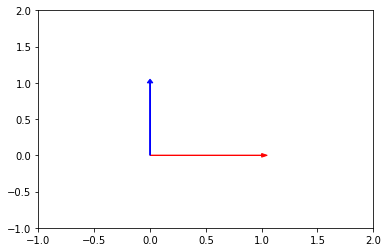

In [48]:
import matplotlib.pyplot as plt

#perpendicular

a = [1,0]
b = [0,1]

plt.xlim(-1,2)
plt.ylim(-1,2)

plt.arrow(0,0, a[0], a[1], head_width=.05, head_length=.05, color='red')
plt.arrow(0,0, b[0], b[1], head_width=.05, head_length=.05, color='blue')
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

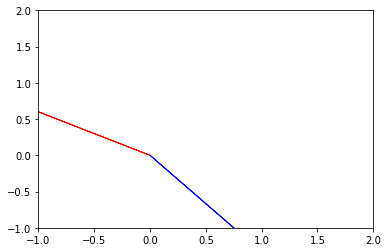

In [49]:
#No, they aren't perpendicular

a = [-5, 3, 7]
b = [6,-8,2]

plt.xlim(-1,2)
plt.ylim(-1,2)

plt.arrow(0,0, a[0], a[1], head_width=.05, head_length=.05, color='red')
plt.arrow(0,0, b[0], b[1], head_width=.05, head_length=.05, color='blue')
plt.show()

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [50]:
#norm squared

c = [2, -15, 6, 20]

norm = np.linalg.norm(c)
norm_squared = norm ** 2

print(norm_squared)

665.0


In [51]:
#dot product

np.dot(c,c)

665

In [52]:
#transposed c's dot product with c

c_T = np.transpose(c)
np.dot(c_T, c)

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}


\begin{align}
d = \begin{bmatrix} 7 \\ 12\end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 3\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 2\hat{i} + 3\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11\\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\0 \end{bmatrix} + 3\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix} + \begin{bmatrix} 0 \\ 0\\ 1 \end{bmatrix} = 2\hat{i} + -4\hat{j} + 1\hat{z}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [59]:
import numpy as np

#[2,-4,1]
#need to fix this

f = [4, 12, 11, 9, 2]
f_array = np.array(f)

magnitude = np.sqrt((f_array**2).sum())

unit_f = f_array/magnitude
print(unit_f)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
#The span is 1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
#The span is 3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}


The rank of P is 3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us how much redundancy there is, and if any of the columns are dependent. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()